In [45]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [46]:
dollar_brazilian_timeserie_full = pd.read_csv('data/us-dollar-vs-brazilian-real-rate.csv', header=0, names=['date', 'rate'])
dollar_brazilian_timeserie_full.head(5)

,date,rate
0,1995-01-02,0.8440
1,1995-01-03,0.8450
2,1995-01-04,0.8450
3,1995-01-05,0.8430
4,1995-01-06,0.8400


In [47]:
print(str(dollar_brazilian_timeserie_full.dtypes) + "\n")
print(type(dollar_brazilian_timeserie_full))

date    object
rate    object
dtype: object

<class 'pandas.core.frame.DataFrame'>


In [48]:
dollar_brazilian_timeserie_full['date'] = pd.to_datetime(dollar_brazilian_timeserie_full['date'])
dollar_brazilian_timeserie_full.head(5)

,date,rate
0,1995-01-02,0.8440
1,1995-01-03,0.8450
2,1995-01-04,0.8450
3,1995-01-05,0.8430
4,1995-01-06,0.8400


In [49]:
print(dollar_brazilian_timeserie_full.tail(5))
print()
print(str(dollar_brazilian_timeserie_full.dtypes) + "\n")
print(type(dollar_brazilian_timeserie_full))
print(dollar_brazilian_timeserie_full.shape)

           date    rate
6177 2018-09-17  4.1718
6178 2018-09-18  4.1277
6179 2018-09-19   4.116
6180 2018-09-20  4.0834
6181 2018-09-21  4.0536

date    datetime64[ns]
rate            object
dtype: object

<class 'pandas.core.frame.DataFrame'>
(6182, 2)


In [50]:
df = dollar_brazilian_timeserie_full.copy()
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
#print(str(df.dtypes) + "\n")
#print(type(df))
print(df.shape)

(6182, 1)


In [54]:
idx = pd.date_range('01-02-1995', '09-21-2018')
df = df.reindex(idx, fill_value=0)
print(df.shape)
print(df.head(5))

(8664, 1)
              rate
1995-01-02  0.8440
1995-01-03  0.8450
1995-01-04  0.8450
1995-01-05  0.8430
1995-01-06  0.8400


In [55]:
df = df.replace(0, np.nan)
df = df.replace('.', np.nan)

print()
print(df.isnull().values.any())
print(df.isnull().sum())


True
rate    2703
dtype: int64


In [56]:
df = df.fillna(method='ffill')

print()
print(df.isnull().values.any())
print(df.isnull().sum())


False
rate    0
dtype: int64


In [57]:
df.rate = pd.to_numeric(df.rate)

print(str(df.dtypes) + "\n")
print(type(df))
df.head(5)

rate    float64
dtype: object

<class 'pandas.core.frame.DataFrame'>


,rate
1995-01-02,0.844
1995-01-03,0.845
1995-01-04,0.845
1995-01-05,0.843
1995-01-06,0.840


Text(0.5,0,'Time')

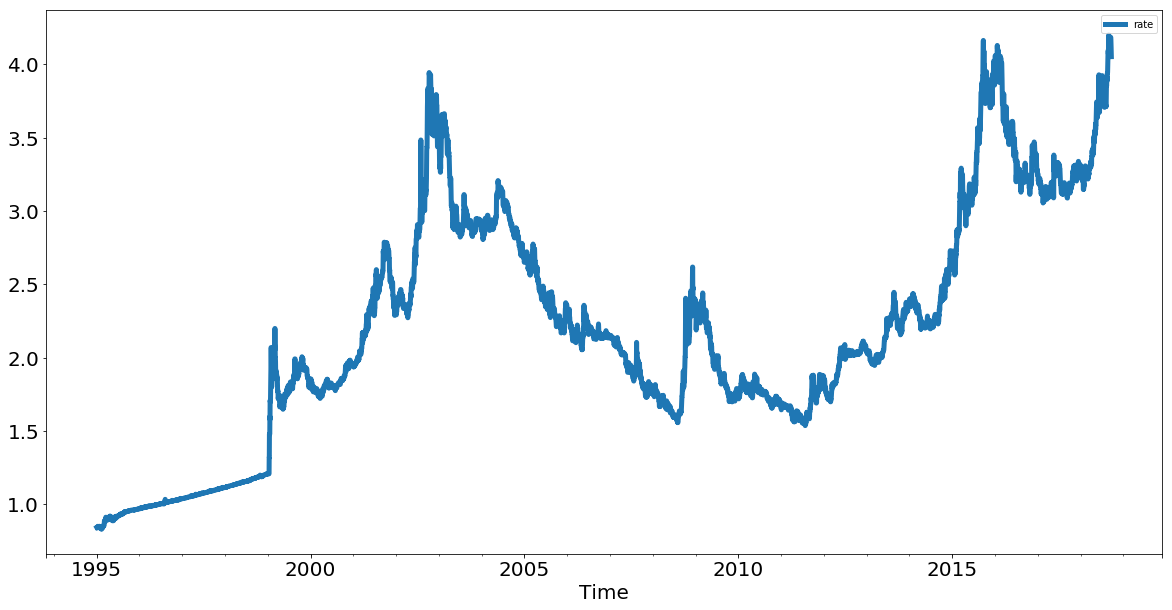

In [58]:
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Time', fontsize=20)

(285, 1)
                rate
1995-01-31  0.845733
1995-02-28  0.841964
1995-03-31  0.889613
1995-04-30  0.906867
1995-05-31  0.897258
                rate
2018-05-31  3.631516
2018-06-30  3.769590
2018-07-31  3.823542
2018-08-31  3.924729
2018-09-30  4.128986


Text(0.5,0,'Time')

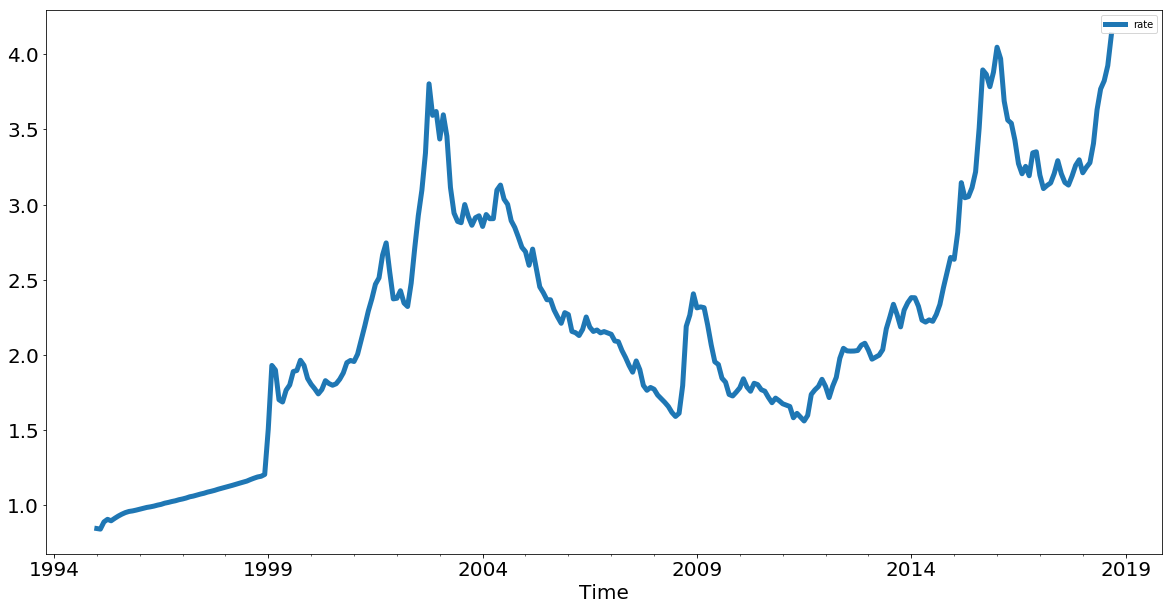

In [64]:
df2 = df.resample('M')
df2 = df2.mean()
print(df2.shape)
print(df2.head(5))
print(df2.tail(5))

df2.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Time', fontsize=20)

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose

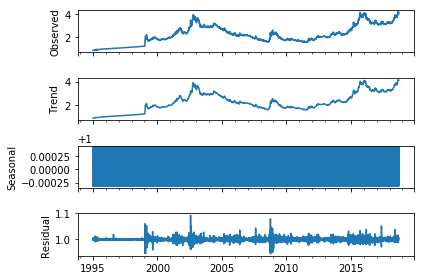

In [69]:
result = seasonal_decompose(df, model='multiplicative')
result.plot()
plt.show()

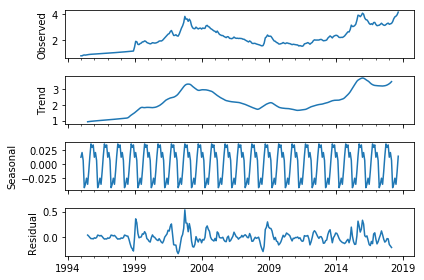

In [68]:
result = seasonal_decompose(df2, model='additive')
result.plot()
plt.show()